<h2> Importing Required Libraries</h2>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
def calc_r2_bar(m, n, r2):    
    dfr = n - 1                     #number of features
    df = m - n                      #number of data points
    rdf = (dfr + df) / df           #ratio of total degrees of freedom to degrees of freedom for error 
    r2_bar = 1 - rdf * (1 - r2)
    return r2_bar

<h3>Loading the Dataset</h3> 

In [3]:
data=pd.read_csv("USA_Housing.csv")

In [4]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [5]:
data.shape

(5000, 6)

<h3>Checking the presence of Null values</h3>

In [6]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

<p> Now, there are no null values present in the dataset</p>

<h3>Exploratory Data Analysis(EDA)</h3>

In [7]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


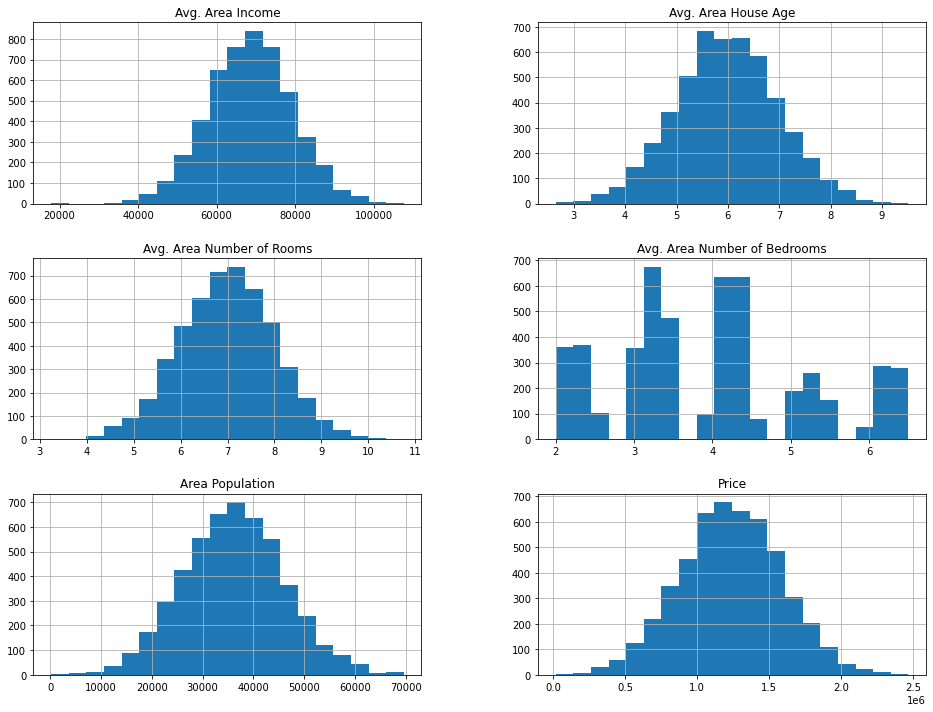

In [8]:
#Plotting Histograms
data.hist(figsize=(16,12),bins=20)
plt.show()

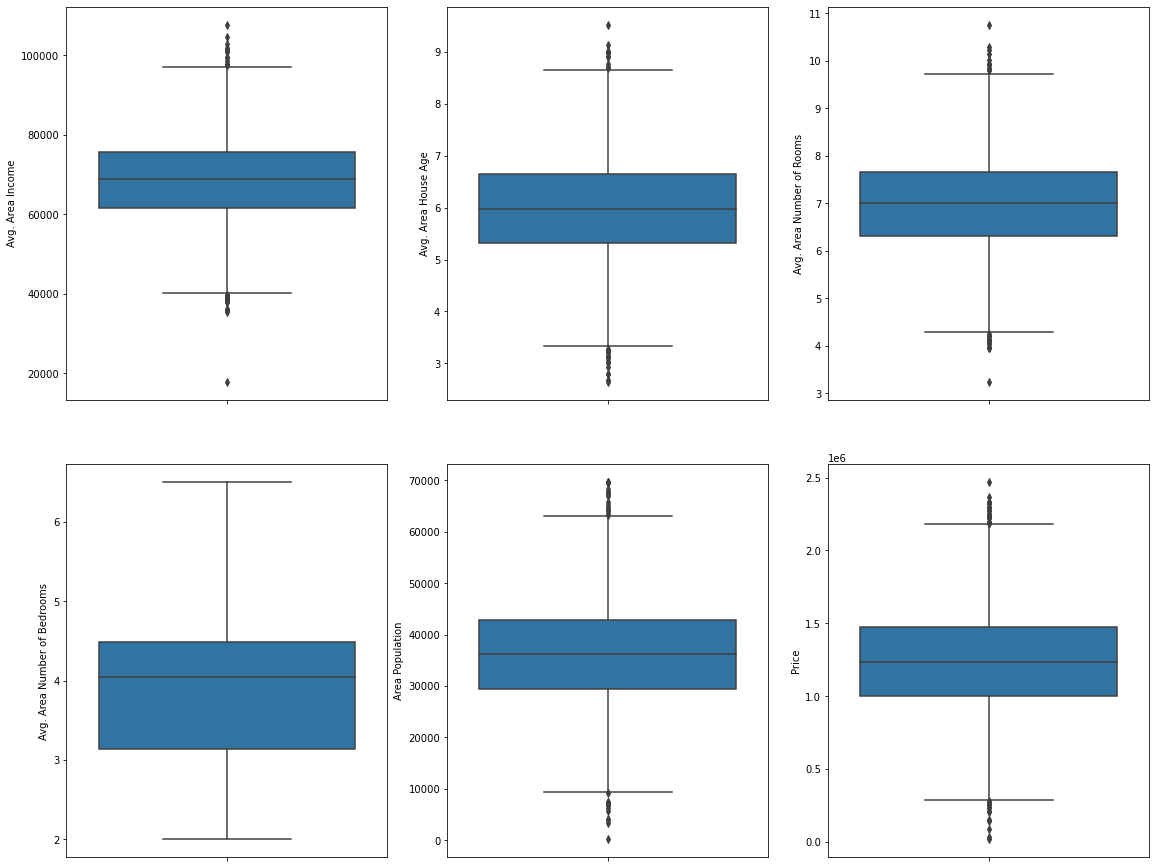

In [11]:
#Boxplots
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16,12))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

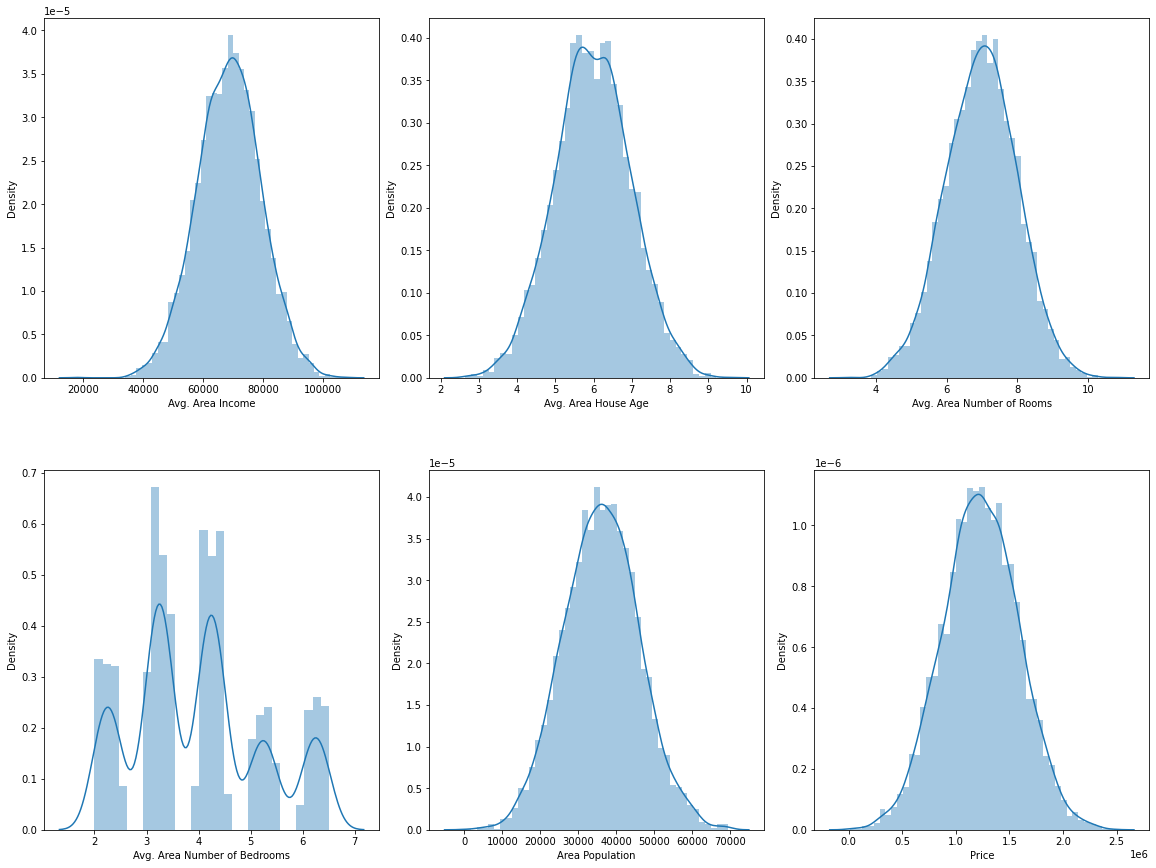

In [12]:
#distribution plot
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16,12))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

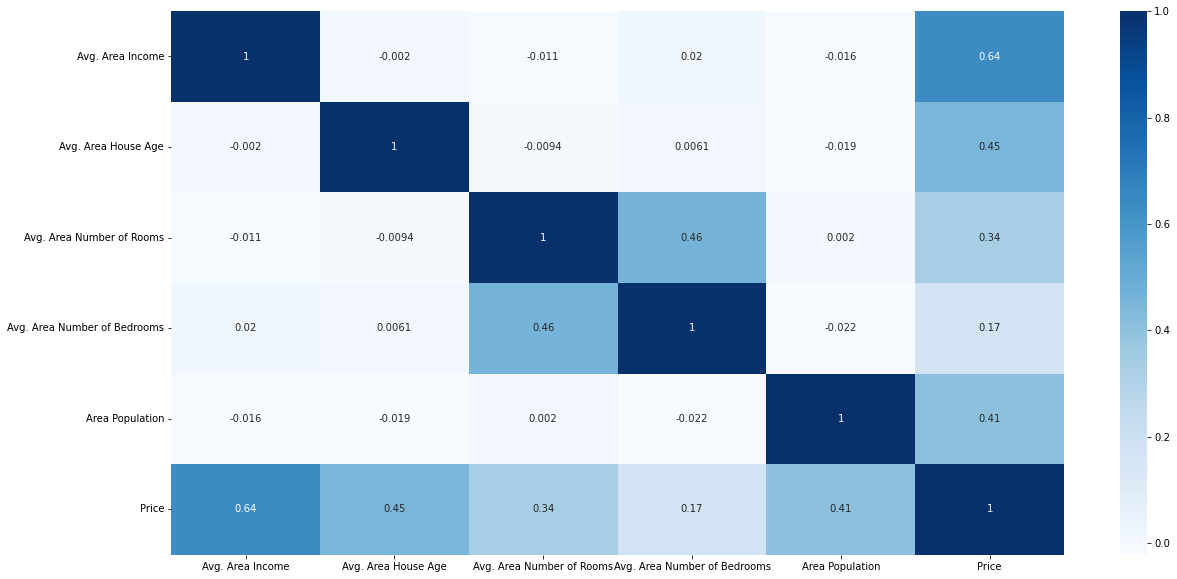

In [14]:
#Correlation Matrix
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues')

<h3>Forward Feature Selection</h3>

In [16]:
x=data.drop('Price',axis=1)
y=data['Price']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=1)
scaler = StandardScaler()
scaler.fit(x)
X_train = pd.DataFrame(scaler.transform(X_train), columns=x.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=x.columns)
y_train=pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [17]:
def adjusted_r2_score(r2, n, k):
    return 1-((1-r2)*(n-1)/(n-k-1))

def regression_fs():
    # create model
    model = Sequential()
    model.add(Dense(i+1, input_dim=i, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

columns = X_train.columns.to_list()
fws_col=[]
temp_r2=-1000;

for i in range(1,len(columns)+1):
    H_NN = regression_fs()
    H_NN2 = H_NN.fit(X_train.iloc[:,0:i], y_train, batch_size=10,validation_split = 0.2, verbose=0,epochs=100)
    
    predict_y = H_NN.predict(X_test.iloc[:,0:i])
    r2_fws=r2_score(y_test,predict_y)
    if(r2_fws>temp_r2):
        fws_col.append(columns[i-1])
        temp_r2=r2_fws;

In [18]:
fws_col

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

In [19]:
X_train = X_train[fws_col]
X_test = X_test[fws_col]

Building Neural nets with relu activation function


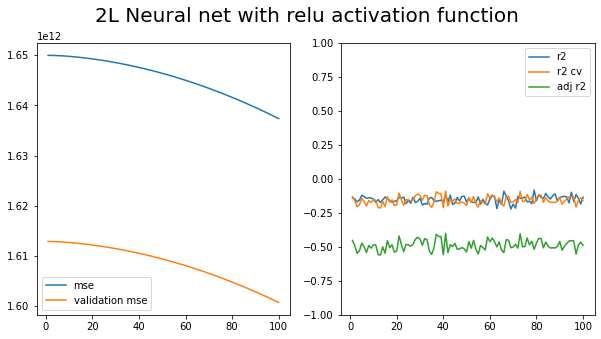

*******************************************************

Building Neural nets with sigmoid activation function


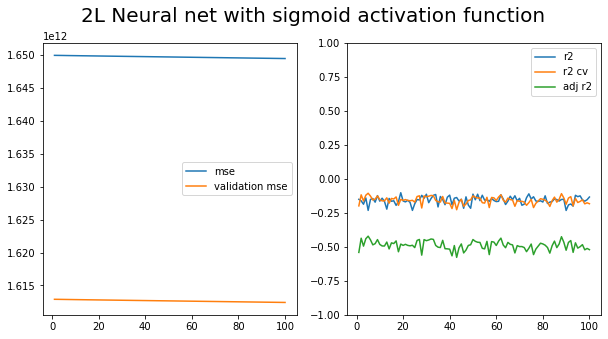

*******************************************************

Building Neural nets with tanh activation function


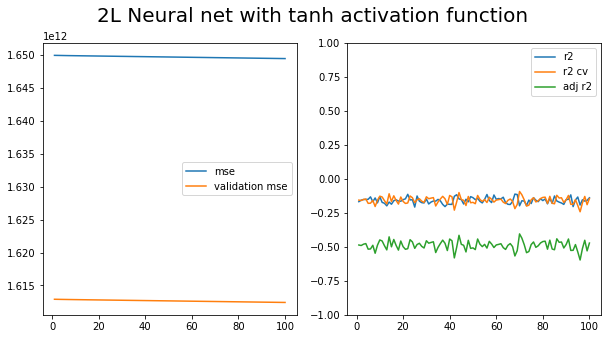

*******************************************************

Building Neural nets with elu activation function


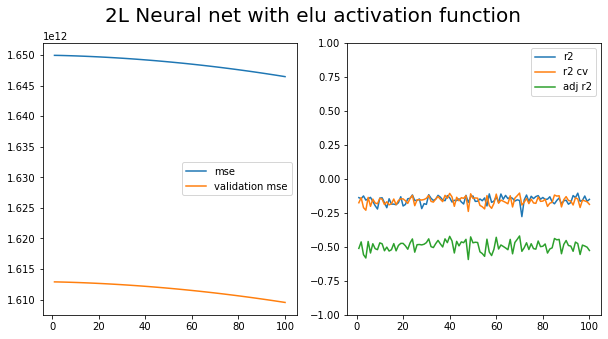

*******************************************************

Building Neural nets with softmax activation function


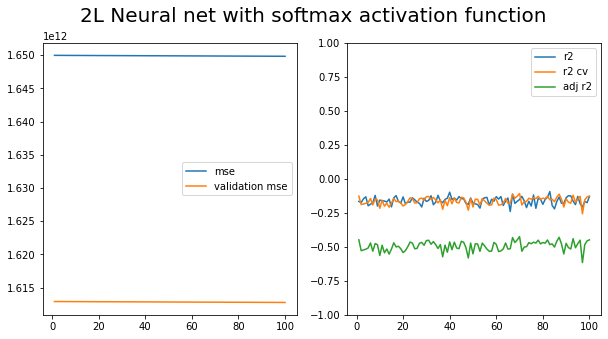

*******************************************************

Building Neural nets with softplus activation function


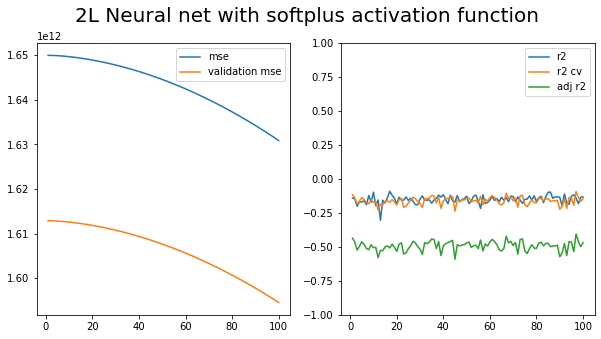

*******************************************************

Building Neural nets with softsign activation function


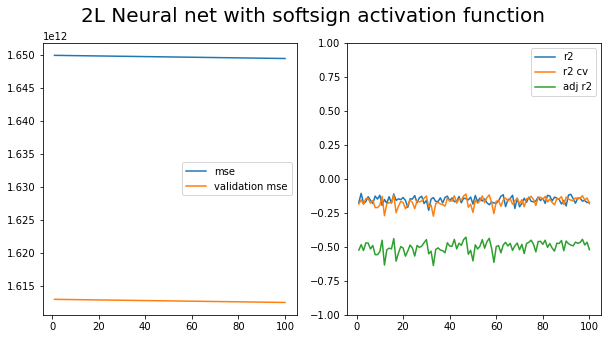

*******************************************************

Building Neural nets with selu activation function


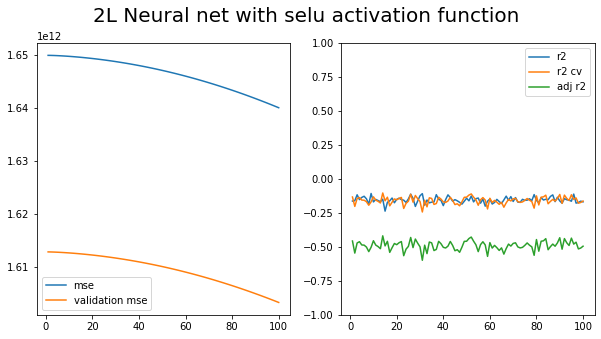

*******************************************************

Building Neural nets with exponential activation function


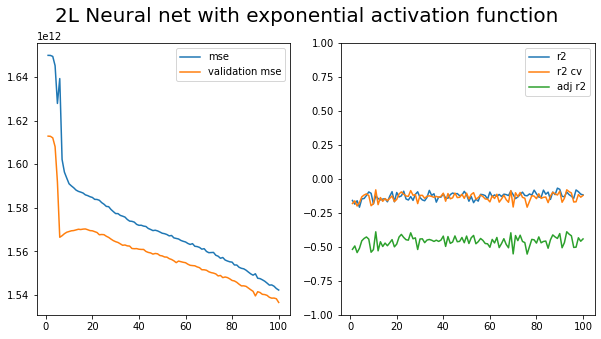

*******************************************************









In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

def adjusted_r2_score(r2, n, k):
    return 1-((1-r2)*(n-1)/(n-k-1))

activation_list = ['relu', 'sigmoid', 'tanh', 'elu','softmax','softplus','softsign','selu','exponential']
epoch_arr = [k for k in range(1,101)]

from keras import backend as K

def r2_coeff(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=-1)), axis=-1)
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))
    

def adj_r2(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=-1)), axis=-1)
    return (1 - (1 - r2_coeff(y_true, y_pred)) * (tf.cast(tf.size(y_true), tf.float32) - 1) / (tf.cast(tf.size(y_true), tf.float32) - tf.cast(tf.rank(y_true), tf.float32) - 1))

def regression(i):
    # create model
    model = Sequential()
    model.add(Dense(len(fws_col)+1, input_dim=len(fws_col), kernel_initializer='normal', activation=i))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse',r2_coeff, adj_r2])
    return model

r2_scores = []
adjusted_r2_scores = []
r2_scores_cv=[]
for i in activation_list:
    print("Building Neural nets with "+i+" activation function")
    Housing_NN = regression(i)
    Housing_NN_cv = regression(i)
    Housing_NN2 = Housing_NN.fit(X_train, y_train, batch_size=10,verbose=0,epochs=100)
    Housing_NN_CV = Housing_NN_cv.fit(X_train, y_train, batch_size=10,validation_split = 0.2, verbose=0,epochs=100)
    plt.subplots(1,2,figsize=(10,5))
    plt.suptitle("2L Neural net with "+i+" activation function", fontsize=20)
    plt.subplot(121)
    plt.plot( epoch_arr, Housing_NN_CV.history['mse'],label="mse")
    plt.plot( epoch_arr,  Housing_NN_CV.history['val_mse'],label="validation mse")
    plt.legend()
    plt.subplot(122)
    plt.plot( epoch_arr,Housing_NN2.history['r2_coeff'],label="r2")
    plt.plot( epoch_arr, Housing_NN_CV.history['r2_coeff'],label="r2 cv")
    plt.plot( epoch_arr, Housing_NN_CV.history['adj_r2'],label="adj r2")
    plt.ylim([-1, 1])
    plt.legend()
    plt.show()
    
    predict_y = Housing_NN.predict(X_test)
    predict_y_cv = Housing_NN_cv.predict(X_test)
    r2=r2_score(y_test,predict_y)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adjusted_r2_score(r2, X_train.shape[0],X_train.shape[1]-1))
    r2_scores_cv.append(r2_score(y_test,predict_y_cv))
    
    print("*******************************************************\n")
print('\n')
print('\n')
print('\n')

In [23]:
for i in range(len(activation_list)):
    print("R2 for NN using",activation_list[i],"activation is ",r2_scores[i]/100)
    print("Adj R2 for NN using",activation_list[i],"activation is ",adjusted_r2_scores[i]/100)
    print("R2 CV for NN using",activation_list[i],"activation is ",r2_scores_cv[i]/100)
    print('\n')

R2 for NN using relu activation is  -0.11727301692833317
Adj R2 for NN using relu activation is  -0.11741867989477475
R2 CV for NN using relu activation is  -0.11851315383732755


R2 for NN using sigmoid activation is  -0.11947478451900252
Adj R2 for NN using sigmoid activation is  -0.11962296739112727
R2 CV for NN using sigmoid activation is  -0.11948425451571548


R2 for NN using tanh activation is  -0.11947440164788124
Adj R2 for NN using tanh activation is  -0.119622584081813
R2 CV for NN using tanh activation is  -0.1194838215686138


R2 for NN using elu activation is  -0.11764853950371032
Adj R2 for NN using elu activation is  -0.11779463225278468
R2 CV for NN using elu activation is  -0.11924373116870904


R2 for NN using softmax activation is  -0.11950884840583809
Adj R2 for NN using softmax activation is  -0.11965707026381331
R2 CV for NN using softmax activation is  -0.11951155427716213


R2 for NN using softplus activation is  -0.11721447077965957
Adj R2 for NN using softplu